<a href="https://colab.research.google.com/github/rafaeldeflon/Pandas_IO/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando os nomes

Utilizando-se a biblioteca pandas para obtenção de uma lista de nomes que será utilizada na criação do dataframe de interesse.

In [ ]:
import pandas as pd

In [ ]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")


In [ ]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()

In [ ]:
nomes.sample(5)

,nome
86,MAURO
93,ADILSON
72,CAROLINE
4,ADRIANA
105,PABLO


# Incluindo ID dos alunos

In [ ]:
import numpy as np

In [ ]:
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

400

In [ ]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1

In [ ]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [ ]:
dominios = ['@dominidoemail.com.br', 'servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominidoemail.com.br
0,JOSE,331,servicodoemail.com
179,IAGO,340,@dominidoemail.com.br
10,SANDRA,174,@dominidoemail.com.br
171,TERESINHA,45,@dominidoemail.com.br


In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominidoemail.com.br,arthur@dominidoemail.com.br
57,DAIANE,303,servicodoemail.com,daianeservicodoemail.com
85,HELENA,221,@dominidoemail.com.br,helena@dominidoemail.com.br
183,IRACI,8,@dominidoemail.com.br,iraci@dominidoemail.com.br
189,DALVA,137,@dominidoemail.com.br,dalva@dominidoemail.com.br


# Criando a tabela Cursos

In [ ]:
!pip3 install html5lib
!pip3 install lxml

In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


# Alterando o index de cursos

In [ ]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [ ]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [ ]:
cursos['id'] = cursos.index + 1

In [ ]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


In [ ]:
cursos = cursos.set_index('id')

In [ ]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominidoemail.com.br,isabel@dominidoemail.com.br
172,REBECA,165,servicodoemail.com,rebecaservicodoemail.com
130,JUNIOR,184,@dominidoemail.com.br,junior@dominidoemail.com.br
70,JOAQUIM,248,servicodoemail.com,joaquimservicodoemail.com
171,VALDEMIR,3,@dominidoemail.com.br,valdemir@dominidoemail.com.br


# Matriculando os alunos nos cursos

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
189,DALVA,137,@dominidoemail.com.br,dalva@dominidoemail.com.br
144,VINICIOS,147,servicodoemail.com,viniciosservicodoemail.com
69,TEREZA,151,servicodoemail.com,terezaservicodoemail.com
105,PABLO,141,@dominidoemail.com.br,pablo@dominidoemail.com.br
109,CELSO,266,servicodoemail.com,celsoservicodoemail.com


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
15,LETICIA,347,@dominidoemail.com.br,leticia@dominidoemail.com.br,2
157,JAIME,214,servicodoemail.com,jaimeservicodoemail.com,1
36,ROBERTO,364,@dominidoemail.com.br,roberto@dominidoemail.com.br,2
91,CELIA,367,@dominidoemail.com.br,celia@dominidoemail.com.br,2
183,MARLON,74,servicodoemail.com,marlonservicodoemail.com,1


In [ ]:
nomes.matriculas.describe()

count    400.000000
mean       2.110000
std        1.560123
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


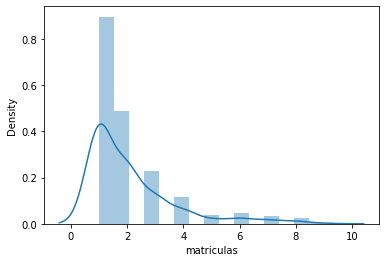

In [ ]:
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    191
2    104
3     49
4     25
6     10
5      8
7      7
8      5
9      1
Name: matriculas, dtype: int64

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominidoemail.com.br,cristiane@dominidoemail.com.br,1
154,NICOLE,182,@dominidoemail.com.br,nicole@dominidoemail.com.br,7
191,TERESA,264,@dominidoemail.com.br,teresa@dominidoemail.com.br,3
132,GABRIELE,72,@dominidoemail.com.br,gabriele@dominidoemail.com.br,6
110,LUCIENE,22,@dominidoemail.com.br,luciene@dominidoemail.com.br,1


# Selecionando Cursos

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
13,BRUNA,34,servicodoemail.com,brunaservicodoemail.com,1
76,CRISTIANO,154,servicodoemail.com,cristianoservicodoemail.com,3
4,CARLOS,230,servicodoemail.com,carlosservicodoemail.com,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x /sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [ ]:
matriculas.head(5)

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [ ]:
nomes.sample

<bound method NDFrame.sample of           nome  id_aluno  ...                         email matriculas
0        MARIA       235  ...    maria@dominidoemail.com.br          3
1          ANA        43  ...         anaservicodoemail.com          1
2    FRANCISCA       304  ...   franciscaservicodoemail.com          1
3      ANTONIA       156  ...  antonia@dominidoemail.com.br          5
4      ADRIANA       343  ...     adrianaservicodoemail.com          1
..         ...       ...  ...                           ...        ...
195     WALTER       231  ...   walter@dominidoemail.com.br          1
196    ARLINDO        99  ...     arlindoservicodoemail.com          1
197    MICHAEL       323  ...  michael@dominidoemail.com.br          5
198     ALVARO       383  ...   alvaro@dominidoemail.com.br          4
199    GEOVANE       366  ...     geovaneservicodoemail.com          1

[400 rows x 5 columns]>

In [ ]:
cursos.sample(3)

,nome_do_curso
id,
11,Preparatório para certificação Java
8,Novas integrações com Java
15,Análise de dados


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


# Saída em diferentes formatos

In [ ]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index=False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,94,Lógica de programação
1,65,Java para Web
2,57,C# para Web
3,51,Ruby on Rails
4,6,Cursos de Python
5,32,PHP com MySql
6,11,.NET para web
7,59,Novas integrações com Java
8,8,TDD com Java
9,48,Código limpo com C#


In [ ]:
matriculas_json = matriculas_por_curso.to_json()

In [ ]:
matriculas_json

'{"quantidade_de_alunos":{"1":94,"2":65,"3":57,"4":51,"5":6,"6":32,"7":11,"8":59,"9":8,"10":48,"11":23,"12":37,"13":8,"14":47,"15":70,"16":21,"17":7,"18":92,"19":45,"20":63},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()

In [ ]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>94</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>65</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>57</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>6</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>11</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>59</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>8</td>
  

# Criando o banco SQL

In [ ]:
!pop install sqlalchemy

/bin/bash: pop: command not found


In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

engine = create_engine('sqlite:///:memory:')
engine
type(engine)

matriculas_por_curso.to_sql('matriculas', engine)

inspector = inspect(engine) # criando um Inspector object
print(inspector.get_table_names()) # Exibindo as tabelas com o inspecto

['matriculas']


# Buscando do banco SQL

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,5,6,Cursos de Python
1,7,11,.NET para web
2,9,8,TDD com Java
3,13,8,Persistência com .NET
4,17,7,Internet das coisas


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
4,Cursos de Python,6
5,PHP com MySql,32
6,.NET para web,11
7,Novas integrações com Java,59
8,TDD com Java,8
9,Código limpo com C#,48


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
4,Cursos de Python,6
5,PHP com MySql,32
6,.NET para web,11
7,Novas integrações com Java,59
8,TDD com Java,8
9,Código limpo com C#,48


In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 80')

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,94
17,Programação funcional,92


# Escrevendo no banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [ ]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [ ]:
matriculas

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1
...,...,...
839,383,3
840,383,18
841,383,18
842,383,12


In [ ]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
35,10,16
107,233,16
109,281,16
157,203,16
181,381,16
244,289,16
387,137,16
457,321,16
485,322,16
521,384,16


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
66,PRISCILA,122,servicodoemail.com,priscilaservicodoemail.com,2
81,LUAN,66,@dominidoemail.com.br,luan@dominidoemail.com.br,7
43,TEREZINHA,158,servicodoemail.com,terezinhaservicodoemail.com,8


In [ ]:
proxima_turma.set_index('id_aluno').join((nomes.set_index('id_aluno')))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
10,16,MARIANA,servicodoemail.com,marianaservicodoemail.com,2
233,16,ELAINE,servicodoemail.com,elaineservicodoemail.com,1
281,16,REGINA,@dominidoemail.com.br,regina@dominidoemail.com.br,5
203,16,TATIANE,@dominidoemail.com.br,tatiane@dominidoemail.com.br,5
381,16,CRISTINA,@dominidoemail.com.br,cristina@dominidoemail.com.br,3
289,16,IVONE,servicodoemail.com,ivoneservicodoemail.com,1
137,16,DALVA,@dominidoemail.com.br,dalva@dominidoemail.com.br,3
321,16,FERNANDO,@dominidoemail.com.br,fernando@dominidoemail.com.br,6
322,16,MARCIO,@dominidoemail.com.br,marcio@dominidoemail.com.br,4


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA
289,IVONE
137,DALVA
321,FERNANDO
322,MARCIO


In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso

In [ ]:
nome_curso

'Estatística básica'

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
proxima_turma

,nome
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA
289,IVONE
137,DALVA
321,FERNANDO
322,MARCIO


In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

In [ ]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
362,NIVALDO
66,LUAN
351,EMANUEL
321,FERNANDO
271,NILTON


# Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,MARIANA
1,ELAINE
2,REGINA
3,TATIANE
4,CRISTINA
5,IVONE
6,DALVA
7,FERNANDO
8,MARCIO
9,RENATO
